# Feature Ideas

- time between hand-off and snap
- area of space infront of ball carrier
    - from other team
    - from own team
    - from everyone
- distance from endzone
- distance from first down
- current down

In [15]:
# options
options(repr.plot.width=12, repr.plot.height=8, warn = -1)
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
options(scipen=999)

# libraries
suppressMessages(library(janitor))
suppressMessages(library(tidyverse))

# functions
source("../src/plots.R")

Read data

In [2]:
train <- read_csv("../data/train_clean.csv", col_types = cols())

In [ ]:
train_features <- read_csv("../data/train_features.csv", col_types = cols())

### Comparison of All Features

Assess which features have the strongest correlation with `rushing_yards`.

In [113]:
train_features <- drop_na(train_features)

In [114]:
head(train_features)

game_id,play_id,team,x_std,y_std,line_of_scrimmage,yards_to_first_down,yards_to_td,yards_from_own_goal,down,defenders_in_the_box,defense_personnel,s,a,rushing_yards,mean_yards_from_ball_carrier_defense,mean_yards_from_ball_carrier_offense,mean_yards_from_ball_carrier_all,DL,LB,DB,OL
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017090700,20170907000118,home,31.25,22.80333,35,2,65,35,3,6,"2 DL, 3 LB, 6 DB",3.63,3.35,8,9.752491,5.609122,7.680806,2,3,6,0
2017090700,20170907000139,home,38.93,26.17333,43,10,57,43,1,6,"2 DL, 3 LB, 6 DB",3.06,2.41,3,10.297028,6.149070,8.223049,2,3,6,0
2017090700,20170907000189,home,61.34,34.22333,35,10,35,65,1,7,"2 DL, 3 LB, 6 DB",5.77,2.42,5,9.903689,6.290334,8.097011,2,3,6,0
2017090700,20170907000345,home,94.47,27.97333,2,2,2,98,2,9,"4 DL, 4 LB, 3 DB",4.45,3.20,2,6.309354,4.284914,5.297134,4,4,3,0
2017090700,20170907000395,away,19.99,27.12000,25,10,75,25,1,7,"3 DL, 2 LB, 6 DB",3.90,2.53,7,11.056456,6.447653,8.752055,3,2,6,0
2017090700,20170907000473,home,67.12,30.60333,29,7,29,71,3,5,"2 DL, 3 LB, 6 DB",3.32,2.76,10,12.152630,7.566113,9.859371,2,3,6,0


In [115]:
correlation_df <- train_features %>%
    select_if(is.numeric) %>%
    select(-game_id, -play_id, -y_std, -rushing_yards, 
           -line_of_scrimmage, -yards_from_own_goal, x_std) %>% # would cover the same things as yards_to_td
    drop_na() %>%
    map_df(function(x) cor(x, train_features$rushing_yards)) %>%
    pivot_longer(cols = everything(), names_to = "variable", values_to = "correlation") %>%
    mutate(variable = as.factor(variable)) %>%
    mutate(variable = fct_reorder(variable, correlation)) %>%
    arrange(desc(correlation))
           
correlation_df

variable,correlation
<fct>,<dbl>
a,0.158873646
mean_yards_from_ball_carrier_defense,0.128652309
mean_yards_from_ball_carrier_all,0.108497245
yards_to_td,0.092544358
s,0.084038678
DB,0.082220567
yards_to_first_down,0.071926691
mean_yards_from_ball_carrier_offense,0.065754590
OL,-0.009276674


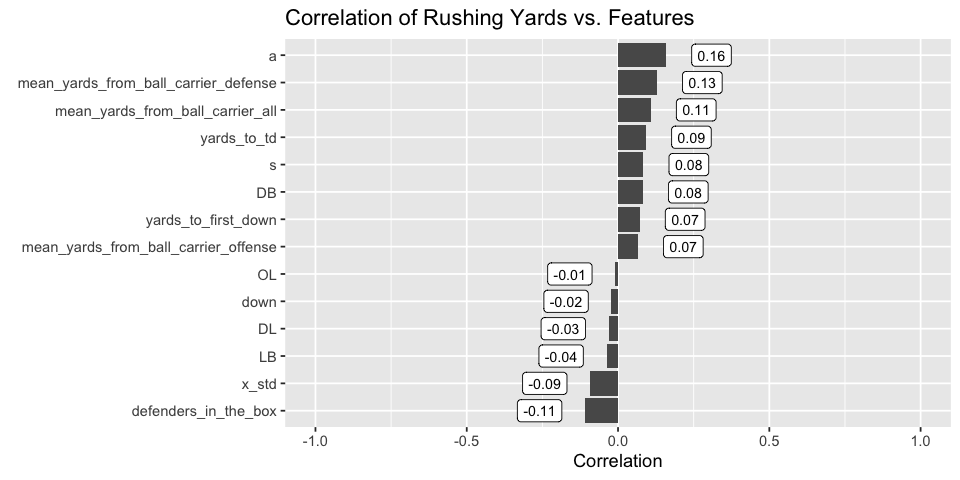

In [158]:
correlation_df %>%
    ggplot(aes(x = variable, y = correlation)) +
    geom_col() +
    scale_y_continuous(limits = c(-1,1)) +
    labs(title = "Correlation of Rushing Yards vs. Features", x = element_blank(), y = "Correlation") +
    geom_label(aes(label = round(correlation, 2), y = correlation + 0.15 * sign(correlation)), size = 3) +
    coord_flip()

### Space around ball carrier

In [12]:
sample_1 <- train %>% filter(play_id == 20171022093887)

In [13]:
head(sample_1)

game_id,play_id,team,x,y,s,a,dis,orientation,dir,nfl_id,display_name,jersey_number,season,line_of_scrimmage,quarter,game_clock,possession_team,down,yards_to_first_down,field_position,home_score_before_play,visitor_score_before_play,nfl_id_rusher,offense_formation,offense_personnel,defenders_in_the_box,defense_personnel,play_direction,time_handoff,time_snap,rushing_yards,player_height,player_weight,player_birth_date,player_college_name,position,home_team_abbr,visitor_team_abbr,week,stadium,location,stadium_type,turf,game_weather,temperature,humidity,wind_speed,wind_direction,to_left,is_ball_carrier,team_on_offense,is_on_offense,yards_from_own_goal,yards_to_td,x_std,y_std
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
2017102209,20171022093887,away,50.17,25.05,2.48,0.90,0.23,334.16,163.65,2532896,Joe Looney,73,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-3,315,08/31/1990,Wake Forest,C,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.17,25.05
2017102209,20171022093887,away,50.97,32.53,4.44,2.00,0.49,35.64,141.82,2533028,James Hanna,84,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-4,260,07/14/1989,Oklahoma,TE,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.97,32.53
2017102209,20171022093887,away,52.17,27.48,4.05,0.27,0.45,348.03,148.57,2539272,Jonathan Cooper,64,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-2,308,01/19/1990,North Carolina,G,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,42.17,27.48
2017102209,20171022093887,away,50.44,26.07,2.21,1.26,0.28,3.56,177.84,2540161,Travis Frederick,72,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-4,320,03/18/1991,Wisconsin,C,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.44,26.07
2017102209,20171022093887,away,47.83,25.53,2.96,0.43,0.33,61.23,155.21,2550400,Keith Smith,41,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-0,240,04/08/1992,San Jose State,FB,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,37.83,25.53
2017102209,20171022093887,away,50.41,28.50,4.59,1.17,0.50,11.03,160.50,2552666,Chaz Green,79,2017,41,4,04:02:00,DAL,1,10,DAL,10,40,2553743,I_FORM,"2 RB, 2 TE, 1 WR",7,"4 DL, 3 LB, 4 DB",right,2017-10-22 22:50:54,2017-10-22 22:50:52,45,6-5,318,04/08/1992,Florida,G,SF,DAL,7,Levis Stadium,"Santa Clara, CA",Outdoor,Natural Grass,Sunny,68,60,10,NW,FALSE,FALSE,away,TRUE,41,59,40.41,28.50


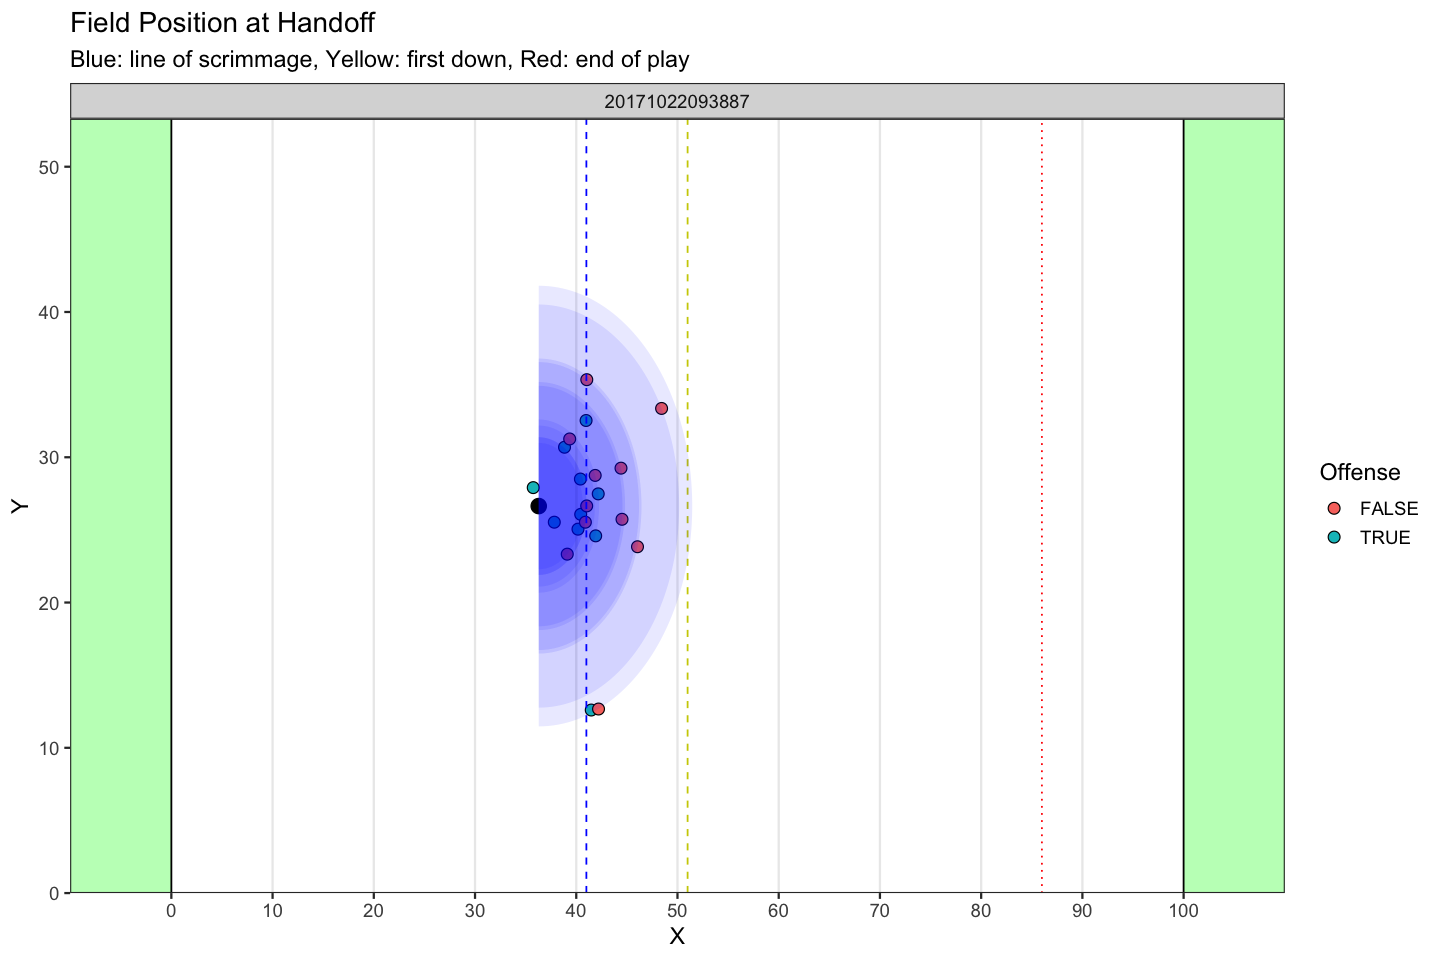

In [16]:
field_1 <- plot_field_circles(sample_1)
field_1

Does the average space around ball carrier correlate with more rushing yards?

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


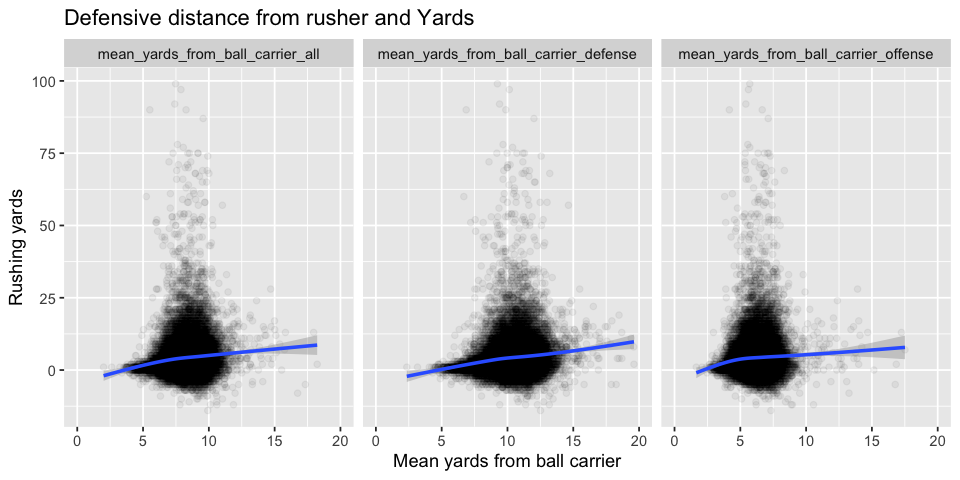

In [102]:
options(repr.plot.width=8, repr.plot.height=4, warn = -1)
train_features %>%
    select(rushing_yards, mean_yards_from_ball_carrier_defense, 
           mean_yards_from_ball_carrier_offense,
           mean_yards_from_ball_carrier_all) %>%
    pivot_longer(cols = -rushing_yards, names_to = "yards_from", values_to = "distance_yards") %>%
    ggplot(aes(x = distance_yards, y = rushing_yards)) +
    geom_point(alpha = 0.05) + 
    scale_x_continuous(limits = c(0, 20)) +
    labs(title = "Defensive distance from rusher and Yards", x = "Mean yards from ball carrier", y = "Rushing yards") +
    facet_wrap(~yards_from) + 
    geom_smooth()

In [103]:
train_features %>%
    select(rushing_yards, mean_yards_from_ball_carrier_defense, 
           mean_yards_from_ball_carrier_offense,
           mean_yards_from_ball_carrier_all) %>%
    pivot_longer(cols = -rushing_yards, names_to = "yards_from", values_to = "distance_yards") %>%
    group_by(yards_from) %>%
    summarise(rushing_yards_mean = mean(distance_yards),
              correlation = cor(distance_yards, rushing_yards))

yards_from,rushing_yards_mean,correlation
<chr>,<dbl>,<dbl>
mean_yards_from_ball_carrier_all,8.291081,0.10849725
mean_yards_from_ball_carrier_defense,10.360063,0.12865231
mean_yards_from_ball_carrier_offense,6.222100,0.06575459


In [1]:
?geom_density_ridges

No documentation for ‘geom_density_ridges’ in specified packages and libraries:
you could try ‘??geom_density_ridges’

In [2]:
?geom_density_ridges

No documentation for ‘geom_density_ridges’ in specified packages and libraries:
you could try ‘??geom_density_ridges’

In [ ]:
?